In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.formula.api as smf 
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import AdaBoostRegressor as ab

In [2]:
df=pd.read_csv('Cars24.csv',index_col=0)
df

,City,Year,Company,Model,Variant,KM_Driven,No._of_Owners,Fuel_Type,Calculated_Score,Original_Price,Discount,On_Road_Price,Ex_Showroom_Price
0,Kolkata,2020,MARUTI,SWIFT,VXI,2944,1,Petrol,474000,682149,67350,614799,600901
1,Kolkata,2022,MAHINDRA,BOLERO NEO,N 10,1271,1,Diesel,474000,1227549,21150,1206399,1196711
2,Kolkata,2018,MARUTI,SWIFT,VXI,79345,1,Petrol,715000,557099,72800,484299,470401
3,Kolkata,2010,HYUNDAI,SANTRO XING,GL,46556,2,Petrol,72000,166299,0,166299,152401
4,Kolkata,2018,HYUNDAI,EON,MAGNA PLUS,2624,1,Petrol,468000,337399,0,337399,327711
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5069,Ahmedabad,2019,HYUNDAI,NEW SANTRO,1.1 SPORTS AMT,12541,1,Petrol,367000,580899,0,580899,571211
5070,Ahmedabad,2017,HYUNDAI,GRAND I10,SPORTZ 1.2 KAPPA VTVT,43676,1,Petrol,169000,518499,0,518499,504601
5071,New Delhi,2018,HONDA,AMAZE,1.2 V CVT I VTEC,11951,1,Petrol,169000,775999,8400,767599,757911
5072,New Delhi,2018,MAHINDRA,XUV500,W11 (O) AT,55280,2,Diesel,315000,1381899,0,1381899,1362492


In [3]:
df['Name']=df['Company']+df['Model']
df

,City,Year,Company,Model,Variant,KM_Driven,No._of_Owners,Fuel_Type,Calculated_Score,Original_Price,Discount,On_Road_Price,Ex_Showroom_Price,Name
0,Kolkata,2020,MARUTI,SWIFT,VXI,2944,1,Petrol,474000,682149,67350,614799,600901,MARUTISWIFT
1,Kolkata,2022,MAHINDRA,BOLERO NEO,N 10,1271,1,Diesel,474000,1227549,21150,1206399,1196711,MAHINDRABOLERO NEO
2,Kolkata,2018,MARUTI,SWIFT,VXI,79345,1,Petrol,715000,557099,72800,484299,470401,MARUTISWIFT
3,Kolkata,2010,HYUNDAI,SANTRO XING,GL,46556,2,Petrol,72000,166299,0,166299,152401,HYUNDAISANTRO XING
4,Kolkata,2018,HYUNDAI,EON,MAGNA PLUS,2624,1,Petrol,468000,337399,0,337399,327711,HYUNDAIEON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5069,Ahmedabad,2019,HYUNDAI,NEW SANTRO,1.1 SPORTS AMT,12541,1,Petrol,367000,580899,0,580899,571211,HYUNDAINEW SANTRO
5070,Ahmedabad,2017,HYUNDAI,GRAND I10,SPORTZ 1.2 KAPPA VTVT,43676,1,Petrol,169000,518499,0,518499,504601,HYUNDAIGRAND I10
5071,New Delhi,2018,HONDA,AMAZE,1.2 V CVT I VTEC,11951,1,Petrol,169000,775999,8400,767599,757911,HONDAAMAZE
5072,New Delhi,2018,MAHINDRA,XUV500,W11 (O) AT,55280,2,Diesel,315000,1381899,0,1381899,1362492,MAHINDRAXUV500


In [4]:
df3=df[['Name','Company','City','Year','KM_Driven','No._of_Owners','Fuel_Type','Calculated_Score','Original_Price','Discount','On_Road_Price','Ex_Showroom_Price']]
df3

,Name,Company,City,Year,KM_Driven,No._of_Owners,Fuel_Type,Calculated_Score,Original_Price,Discount,On_Road_Price,Ex_Showroom_Price
0,MARUTISWIFT,MARUTI,Kolkata,2020,2944,1,Petrol,474000,682149,67350,614799,600901
1,MAHINDRABOLERO NEO,MAHINDRA,Kolkata,2022,1271,1,Diesel,474000,1227549,21150,1206399,1196711
2,MARUTISWIFT,MARUTI,Kolkata,2018,79345,1,Petrol,715000,557099,72800,484299,470401
3,HYUNDAISANTRO XING,HYUNDAI,Kolkata,2010,46556,2,Petrol,72000,166299,0,166299,152401
4,HYUNDAIEON,HYUNDAI,Kolkata,2018,2624,1,Petrol,468000,337399,0,337399,327711
...,...,...,...,...,...,...,...,...,...,...,...,...
5069,HYUNDAINEW SANTRO,HYUNDAI,Ahmedabad,2019,12541,1,Petrol,367000,580899,0,580899,571211
5070,HYUNDAIGRAND I10,HYUNDAI,Ahmedabad,2017,43676,1,Petrol,169000,518499,0,518499,504601
5071,HONDAAMAZE,HONDA,New Delhi,2018,11951,1,Petrol,169000,775999,8400,767599,757911
5072,MAHINDRAXUV500,MAHINDRA,New Delhi,2018,55280,2,Diesel,315000,1381899,0,1381899,1362492


In [5]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5074 entries, 0 to 5073
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               5074 non-null   object
 1   Company            5074 non-null   object
 2   City               5074 non-null   object
 3   Year               5074 non-null   int64 
 4   KM_Driven          5074 non-null   int64 
 5   No._of_Owners      5074 non-null   int64 
 6   Fuel_Type          5074 non-null   object
 7   Calculated_Score   5074 non-null   int64 
 8   Original_Price     5074 non-null   int64 
 9   Discount           5074 non-null   int64 
 10  On_Road_Price      5074 non-null   int64 
 11  Ex_Showroom_Price  5074 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 515.3+ KB


In [6]:
df3.describe()

,Year,KM_Driven,No._of_Owners,Calculated_Score,Original_Price,Discount,On_Road_Price,Ex_Showroom_Price
count,5074.000000,5074.000000,5074.000000,5.074000e+03,5.074000e+03,5074.000000,5.074000e+03,5.074000e+03
mean,2017.621206,41210.893772,1.247931,4.295598e+05,7.114958e+05,24833.571147,6.866622e+05,6.752083e+05
std,2.657087,26334.317837,0.464829,2.228237e+05,3.741656e+05,37170.672555,3.524276e+05,3.522017e+05
min,2008.000000,51.000000,1.000000,2.070000e+02,1.413990e+05,0.000000,1.350990e+05,1.225570e+05
25%,2016.000000,19970.250000,1.000000,1.810000e+05,4.566240e+05,0.000000,4.416240e+05,4.304335e+05
50%,2018.000000,37710.500000,1.000000,4.680000e+05,6.077490e+05,10350.000000,5.922990e+05,5.810060e+05
75%,2020.000000,59113.250000,1.000000,5.070000e+05,8.586740e+05,34075.000000,8.369990e+05,8.254785e+05
max,2022.000000,455601.000000,4.000000,1.698000e+06,3.242999e+06,380700.000000,3.237699e+06,3.228011e+06


In [7]:
c1=df3['Name'].value_counts()
c1.tail(50)

TATASAFARI                6
MAHINDRABOLERO            6
MGHECTOR PLUS             6
SKODAKUSHAQ               6
TOYOTAINNOVA CRYSTA       5
NISSANMICRA ACTIVE        5
NISSANTERRANO             5
HONDABR-V                 5
VOLKSWAGENTAIGUN          5
MARUTIOMNI E              4
MARUTIWAGON R             4
SKODAOCTAVIA              4
HYUNDAITUCSON NEW         4
MARUTIZEN ESTILO          4
MARUTIWAGON R STINGRAY    4
TATAPUNCH                 3
MGASTOR                   3
FORDENDEAVOUR             3
FORDNEW FIGO              3
SKODASLAVIA               3
HONDACRV                  3
TATANEXON                 2
RENAULTPULSE              2
HYUNDAIACCENT             2
TOYOTACAMRY               2
TATATIAGO NRG             2
AUDIA6                    2
MARUTIBREZZA              2
DATSUNGO PLUS             2
TOYOTAINNOVA              2
AUDIQ3                    2
KIACARENS                 2
HYUNDAIALCAZAR            2
HYUNDAINEW I20 N LINE     1
MAHINDRABOLERO NEO        1
FORDFIGO            

In [8]:
rep=c1[c1<=9].index
df2=df3[(df3['Name'].isin(rep))==True]
l=[]
for i in df2.index:
    l.append(i)

In [9]:
df3.drop(index=l,inplace=True)

In [10]:
df3=df3.reset_index(drop=True)
df3

,Name,Company,City,Year,KM_Driven,No._of_Owners,Fuel_Type,Calculated_Score,Original_Price,Discount,On_Road_Price,Ex_Showroom_Price
0,MARUTISWIFT,MARUTI,Kolkata,2020,2944,1,Petrol,474000,682149,67350,614799,600901
1,MARUTISWIFT,MARUTI,Kolkata,2018,79345,1,Petrol,715000,557099,72800,484299,470401
2,HYUNDAIEON,HYUNDAI,Kolkata,2018,2624,1,Petrol,468000,337399,0,337399,327711
3,MARUTIWAGON R 1.0,MARUTI,Kolkata,2014,10953,1,Petrol,140000,356599,0,356599,344057
4,HYUNDAIELITE I20,HYUNDAI,Kolkata,2019,21415,1,Petrol,474000,537899,5000,532899,519001
...,...,...,...,...,...,...,...,...,...,...,...,...
4854,HYUNDAINEW SANTRO,HYUNDAI,Ahmedabad,2019,12541,1,Petrol,367000,580899,0,580899,571211
4855,HYUNDAIGRAND I10,HYUNDAI,Ahmedabad,2017,43676,1,Petrol,169000,518499,0,518499,504601
4856,HONDAAMAZE,HONDA,New Delhi,2018,11951,1,Petrol,169000,775999,8400,767599,757911
4857,MAHINDRAXUV500,MAHINDRA,New Delhi,2018,55280,2,Diesel,315000,1381899,0,1381899,1362492


In [11]:
df1=df3[['KM_Driven','No._of_Owners','Calculated_Score','Original_Price','On_Road_Price','Ex_Showroom_Price','Calculated_Score']]
df1

,KM_Driven,No._of_Owners,Calculated_Score,Original_Price,On_Road_Price,Ex_Showroom_Price,Calculated_Score
0,2944,1,474000,682149,614799,600901,474000
1,79345,1,715000,557099,484299,470401,715000
2,2624,1,468000,337399,337399,327711,468000
3,10953,1,140000,356599,356599,344057,140000
4,21415,1,474000,537899,532899,519001,474000
...,...,...,...,...,...,...,...
4854,12541,1,367000,580899,580899,571211,367000
4855,43676,1,169000,518499,518499,504601,169000
4856,11951,1,169000,775999,767599,757911,169000
4857,55280,2,315000,1381899,1381899,1362492,315000


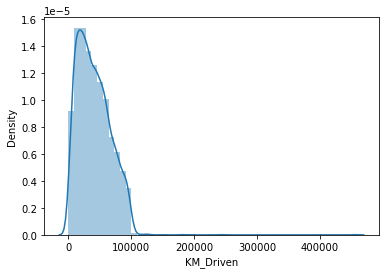

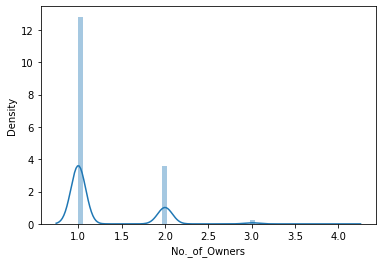

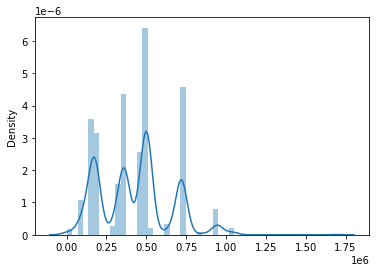

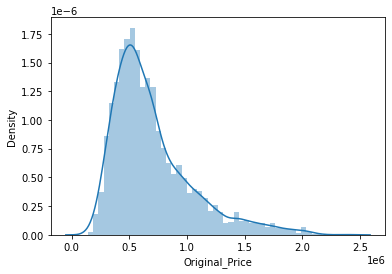

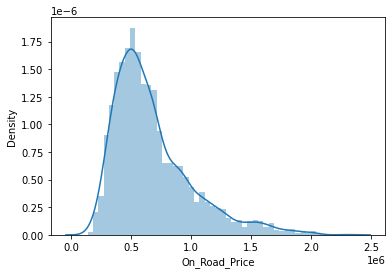

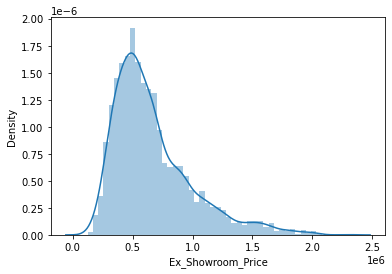

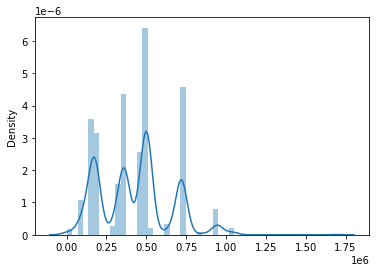

In [12]:
for i in df1.columns:
        sns.distplot(df1[i])
        plt.show()

In [13]:
for i in df1.columns:
     print(df1[i].skew())

1.3628883455504899
1.6342873127929625
Calculated_Score    0.53418
Calculated_Score    0.53418
dtype: float64
1.4227395668968517
1.3687302637989114
1.3684963716316383
Calculated_Score    0.53418
Calculated_Score    0.53418
dtype: float64


In [14]:
dff=df1.apply(lambda x:np.log(x))
dff

,KM_Driven,No._of_Owners,Calculated_Score,Original_Price,On_Road_Price,Ex_Showroom_Price,Calculated_Score
0,7.987524,0.000000,13.068963,13.433003,13.329051,13.306185,13.068963
1,11.281561,0.000000,13.480038,13.230498,13.090458,13.061341,13.480038
2,7.872455,0.000000,13.056224,12.729021,12.729021,12.699887,13.056224
3,9.301369,0.000000,11.849398,12.784367,12.784367,12.748563,11.849398
4,9.971847,0.000000,13.068963,13.195426,13.186087,13.159661,13.068963
...,...,...,...,...,...,...,...
4854,9.436759,0.000000,12.813117,13.272332,13.272332,13.255514,12.813117
4855,10.684554,0.000000,12.037654,13.158693,13.158693,13.131523,12.037654
4856,9.388570,0.000000,12.037654,13.561907,13.551023,13.538321,12.037654
4857,10.920166,0.693147,12.660328,14.138969,14.138969,14.124826,12.660328


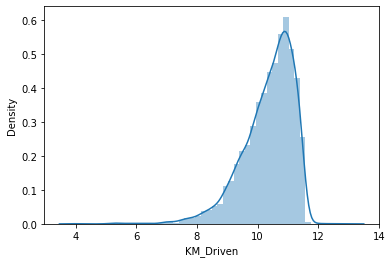

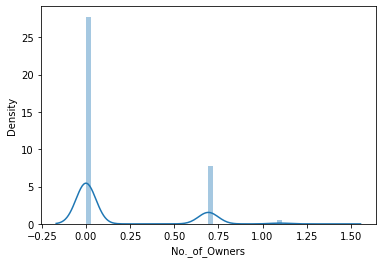

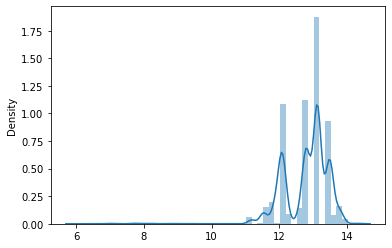

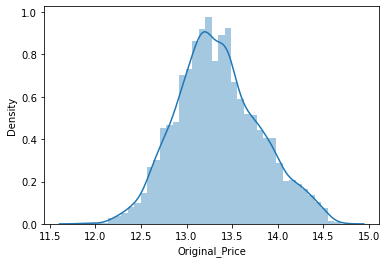

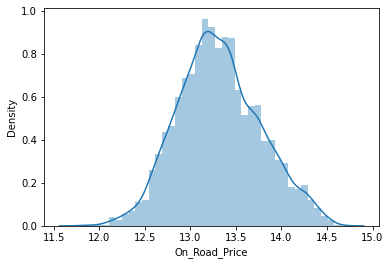

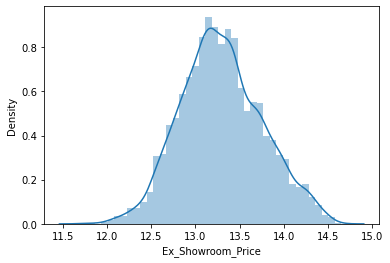

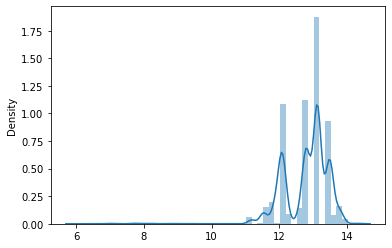

In [15]:
for i in dff.columns:
    sns.distplot(dff[i])
    plt.show()

In [16]:
for i in dff.columns:
    print(dff[i].skew())

-1.3561461844034688
1.3913524471884111
Calculated_Score   -2.352547
Calculated_Score   -2.352547
dtype: float64
0.236505364875808
0.18517094843602044
0.15855761494734186
Calculated_Score   -2.352547
Calculated_Score   -2.352547
dtype: float64


## Heatmap For Checking Multicolinarity 

<AxesSubplot:>

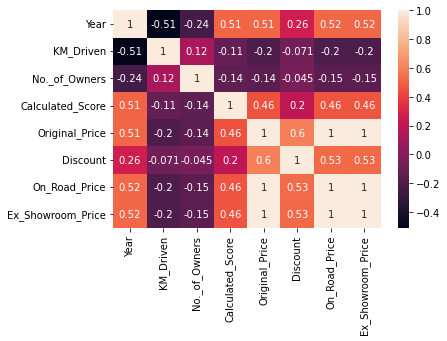

In [17]:
sns.heatmap(df3.corr(),annot=True)

In [18]:
#df3.drop('Ex_Showroom_Price',axis=1,inplace=True)

In [19]:
df3.drop(df3.columns[[8,9,11]], axis=1, inplace=True)

In [20]:
df3

,Name,Company,City,Year,KM_Driven,No._of_Owners,Fuel_Type,Calculated_Score,On_Road_Price
0,MARUTISWIFT,MARUTI,Kolkata,2020,2944,1,Petrol,474000,614799
1,MARUTISWIFT,MARUTI,Kolkata,2018,79345,1,Petrol,715000,484299
2,HYUNDAIEON,HYUNDAI,Kolkata,2018,2624,1,Petrol,468000,337399
3,MARUTIWAGON R 1.0,MARUTI,Kolkata,2014,10953,1,Petrol,140000,356599
4,HYUNDAIELITE I20,HYUNDAI,Kolkata,2019,21415,1,Petrol,474000,532899
...,...,...,...,...,...,...,...,...,...
4854,HYUNDAINEW SANTRO,HYUNDAI,Ahmedabad,2019,12541,1,Petrol,367000,580899
4855,HYUNDAIGRAND I10,HYUNDAI,Ahmedabad,2017,43676,1,Petrol,169000,518499
4856,HONDAAMAZE,HONDA,New Delhi,2018,11951,1,Petrol,169000,767599
4857,MAHINDRAXUV500,MAHINDRA,New Delhi,2018,55280,2,Diesel,315000,1381899


<AxesSubplot:>

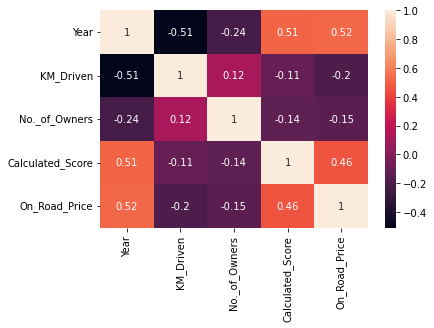

In [21]:
sns.heatmap(df3.corr(),annot=True)

# Splitting The Data Into Train And Test

In [22]:
x=df3.drop('On_Road_Price',axis=1)
y=df3['On_Road_Price']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

# Model Validation By Creating A Pipeline

# Preprocessing To Create A PipeLine

In [24]:
trf1=ColumnTransformer(transformers=[('encoding',OneHotEncoder(sparse=False,drop='first'),
                                      ['Name','Company','City','Fuel_Type'])],remainder='passthrough')

In [25]:
trf1.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoding',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['Name', 'Company', 'City', 'Fuel_Type'])])

In [82]:
df4=pd.DataFrame(trf1.transform(x_train))

In [27]:
trf2=ColumnTransformer([('scale',MinMaxScaler(),slice(0,108))])

In [28]:
#Training with various model
trf4=LinearRegression()
trf5=rf()
trf6=DecisionTreeRegressor()
trf7=BaggingRegressor()
trf8=KNeighborsRegressor()
trf9=LinearSVR()
trf10=ab()

# Pipe Line For Linear Regression

In [29]:
pipe=make_pipeline(trf1,trf2,trf4)

In [30]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoding',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Name', 'Company', 'City',
                                                   'Fuel_Type'])])),
                ('columntransformer-2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 108, None))])),
                ('linearregression', LinearRegression())])

In [31]:
y_pred=pipe.predict(x_test)

Score 0.910005548275305
R2 Score 0.910005548275305
MSE 10102875111.043837


Text(0.5, 1.0, 'Distribution Of Residuals')

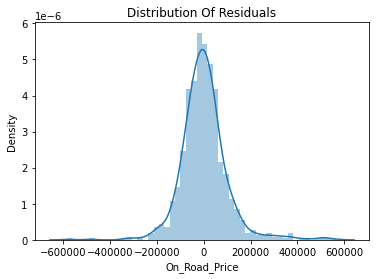

In [32]:
print('Score',pipe.score(x_test,y_test))
print('R2 Score',r2_score(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
sns.distplot(y_test-y_pred)
plt.title('Distribution Of Residuals')

Text(0.5, 1.0, 'Actual VS Predicted')

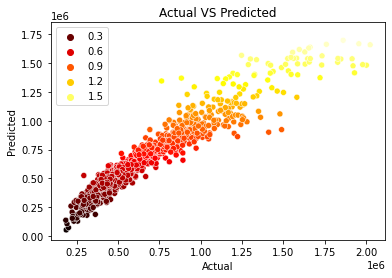

In [33]:
sns.scatterplot(y_test,y_pred,hue=y_pred,palette='hot')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted')

## Prediction:

In [34]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,
'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_y_df[0:5]

,Actual Value,Predicted Value,Difference
1039,2025199,1.658747e+06,366452.108754
3077,500899,5.346373e+05,-33738.271932
4487,305499,3.764271e+05,-70928.056542
1365,443799,3.500732e+05,93725.757434
940,545099,5.082491e+05,36849.883685


# Pipe Line For RandomForest

In [35]:
pipe1=make_pipeline(trf1,trf2,trf5)

In [36]:
pipe1.fit(x_train,y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoding',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Name', 'Company', 'City',
                                                   'Fuel_Type'])])),
                ('columntransformer-2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 108, None))])),
                ('randomforestregressor', RandomForestRegressor())])

In [37]:
y_pred1=pipe1.predict(x_test)

Score 0.9149635225187518
R2 Score 0.9149635225187518
MSE 9546287525.63861


Text(0.5, 1.0, 'Distribution Of Residuals')

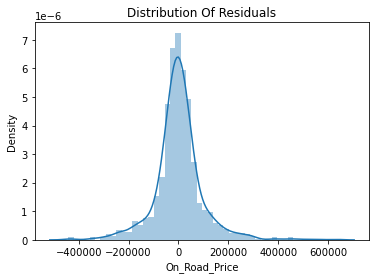

In [38]:
print('Score',pipe1.score(x_test,y_test))
print('R2 Score',r2_score(y_test,y_pred1))
print('MSE',mean_squared_error(y_test,y_pred1))
sns.distplot(y_test-y_pred1)
plt.title('Distribution Of Residuals')

Text(0.5, 1.0, 'Actual VS Predicted')

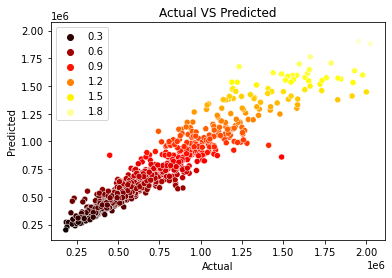

In [39]:
sns.scatterplot(y_test,y_pred1,hue=y_pred1,palette='hot')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted')

## Prediction

In [40]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,
'Predicted Value':y_pred1,'Difference':y_test-y_pred1})
pred_y_df[0:15]

,Actual Value,Predicted Value,Difference
1039,2025199,1880938.5,144260.5
3077,500899,509853.0,-8954.0
4487,305499,314924.5,-9425.5
1365,443799,416017.5,27781.5
940,545099,509156.0,35943.0
2360,502699,603756.0,-101057.0
497,721699,714479.5,7219.5
4131,659399,634511.5,24887.5
1759,568599,583703.0,-15104.0
2191,887399,835031.9,52367.1


# Pipe Line For DecisionTree

In [41]:
pipe2=make_pipeline(trf1,trf2,trf6)

In [42]:
pipe2.fit(x_train,y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoding',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Name', 'Company', 'City',
                                                   'Fuel_Type'])])),
                ('columntransformer-2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 108, None))])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [43]:
y_pred2=pipe2.predict(x_test)
#y_pred2

Score 0.807456914616797
R2 Score 0.807456914616797
MSE 21615096351.409466


Text(0.5, 1.0, 'Distribution Of Residuals')

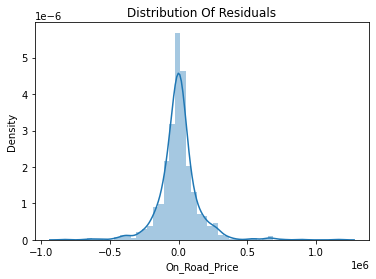

In [44]:
print('Score',pipe2.score(x_test,y_test))
print('R2 Score',r2_score(y_test,y_pred2))
print('MSE',mean_squared_error(y_test,y_pred2))
sns.distplot(y_test-y_pred2)
plt.title('Distribution Of Residuals')

Text(0.5, 1.0, 'Actual VS Predicted')

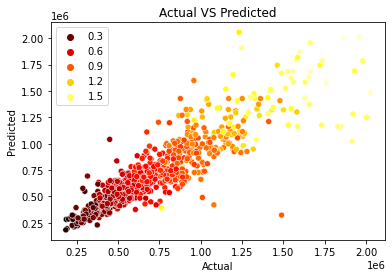

In [45]:
sns.scatterplot(y_test,y_pred2,hue=y_pred,palette='hot')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted')

## Prediction: 

In [46]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,
'Predicted Value':y_pred2,'Difference':y_test-y_pred2})
pred_y_df[0:5]

,Actual Value,Predicted Value,Difference
1039,2025199,1483799.0,541400.0
3077,500899,465999.0,34900.0
4487,305499,300899.0,4600.0
1365,443799,413249.0,30550.0
940,545099,520899.0,24200.0


# Pipe Line For BaggingRegressor

In [47]:
pipe3=make_pipeline(trf1,trf2,trf7)

In [48]:
pipe3.fit(x_train,y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoding',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Name', 'Company', 'City',
                                                   'Fuel_Type'])])),
                ('columntransformer-2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 108, None))])),
                ('baggingregressor', BaggingRegressor())])

In [49]:
y_pred3=pipe3.predict(x_test)
#y_pred3

Score 0.901972563901898
R2 Score 0.901972563901898
MSE 11004666680.837118


Text(0.5, 1.0, 'Distribution of Residuals')

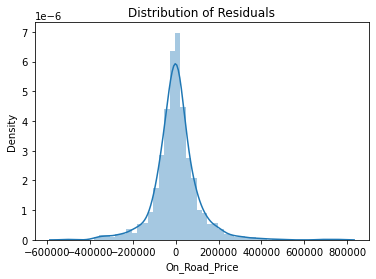

In [50]:
print('Score',pipe3.score(x_test,y_test))
print('R2 Score',r2_score(y_test,y_pred3))
print('MSE',mean_squared_error(y_test,y_pred3))
sns.distplot(y_test-y_pred3)
plt.title('Distribution of Residuals')

Text(0.5, 1.0, 'Actual VS Predicted')

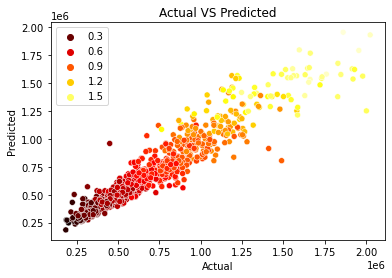

In [51]:
sns.scatterplot(y_test,y_pred3,hue=y_pred,palette='hot')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted')

## Prediction: 

In [52]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,
'Predicted Value':y_pred3,'Difference':y_test-y_pred3})
pred_y_df[0:5]

,Actual Value,Predicted Value,Difference
1039,2025199,1928049.0,97150.0
3077,500899,506039.0,-5140.0
4487,305499,324199.0,-18700.0
1365,443799,413894.0,29905.0
940,545099,528129.0,16970.0


# Pipe Line For KNeighborsRegressor

In [53]:
pipe4=make_pipeline(trf1,trf2,trf8)

In [54]:
pipe4.fit(x_train,y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoding',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Name', 'Company', 'City',
                                                   'Fuel_Type'])])),
                ('columntransformer-2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 108, None))])),
                ('kneighborsregressor', KNeighborsRegressor())])

In [55]:
y_pred4=pipe4.predict(x_test)
#y_pred4

Score 0.8489209919448464
R2 Score 0.8489209919448464
MSE 16960293896.237694


Text(0.5, 1.0, 'Distribution Of Residuals')

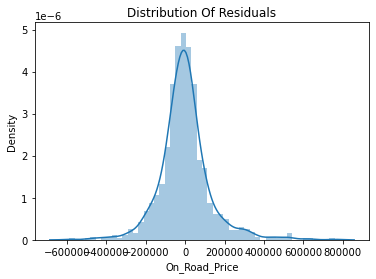

In [56]:
print('Score',pipe4.score(x_test,y_test))
print('R2 Score',r2_score(y_test,y_pred4))
print('MSE',mean_squared_error(y_test,y_pred4))
sns.distplot(y_test-y_pred4)
plt.title('Distribution Of Residuals')

Text(0.5, 1.0, 'Actual VS Predicted')

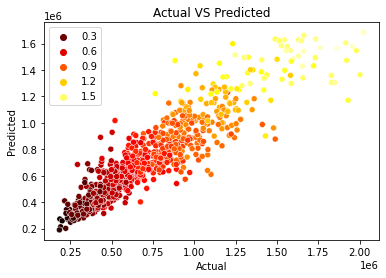

In [57]:
sns.scatterplot(y_test,y_pred4,hue=y_pred,palette='hot')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted')

## Predictions: 

In [58]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,
'Predicted Value':y_pred4,'Difference':y_test-y_pred4})
pred_y_df[0:5]

,Actual Value,Predicted Value,Difference
1039,2025199,1685959.0,339240.0
3077,500899,544999.0,-44100.0
4487,305499,301259.0,4240.0
1365,443799,437219.0,6580.0
940,545099,517679.0,27420.0


# Pipe Line For Support Vactor Regressor

In [59]:
pipe5=make_pipeline(trf1,trf2,trf9)

In [60]:
pipe5.fit(x_train,y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoding',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Name', 'Company', 'City',
                                                   'Fuel_Type'])])),
                ('columntransformer-2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 108, None))])),
                ('linearsvr', LinearSVR())])

In [61]:
y_pred5=pipe5.predict(x_test)
#y_pred5

Score -4.0607584890788475
R2 Score -4.0607584890788475
MSE 568126256702.2076


Text(0.5, 1.0, 'Distribution Of Residuals')

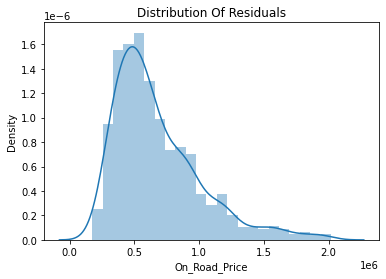

In [62]:
print('Score',pipe5.score(x_test,y_test))
print('R2 Score',r2_score(y_test,y_pred5))
print('MSE',mean_squared_error(y_test,y_pred5))
sns.distplot(y_test-y_pred5)
plt.title('Distribution Of Residuals')

Text(0.5, 1.0, 'Actual VS Predicted')

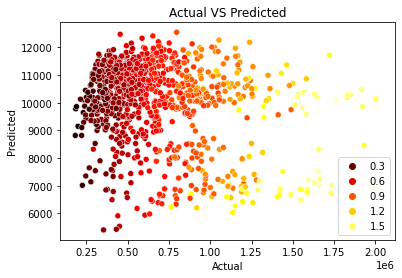

In [63]:
sns.scatterplot(y_test,y_pred5,hue=y_pred,palette='hot')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted')

## Predictions: 

In [64]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,
'Predicted Value':y_pred5,'Difference':y_test-y_pred5})
pred_y_df[0:5]

,Actual Value,Predicted Value,Difference
1039,2025199,6909.067319,2.018290e+06
3077,500899,11324.572585,4.895744e+05
4487,305499,11256.297048,2.942427e+05
1365,443799,9445.480043,4.343535e+05
940,545099,11412.922012,5.336861e+05


# Pipe Line For AdaBoost

In [65]:
pipe6=make_pipeline(trf1,trf2,trf10)

In [66]:
pipe6.fit(x_train,y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoding',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Name', 'Company', 'City',
                                                   'Fuel_Type'])])),
                ('columntransformer-2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 108, None))])),
                ('adaboostregressor', AdaBoostRegressor())])

In [67]:
y_pred6=pipe6.predict(x_test)
#y_pred6

Score 0.4666077609297118
R2 Score 0.4666077609297118
MSE 59879193364.18872


Text(0.5, 1.0, 'Distribution Of Residuals')

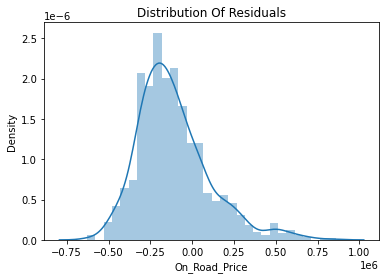

In [68]:
print('Score',pipe6.score(x_test,y_test))
print('R2 Score',r2_score(y_test,y_pred6))
print('MSE',mean_squared_error(y_test,y_pred6))
sns.distplot(y_test-y_pred6)
plt.title('Distribution Of Residuals')

Text(0.5, 1.0, 'Actual VS Predicted')

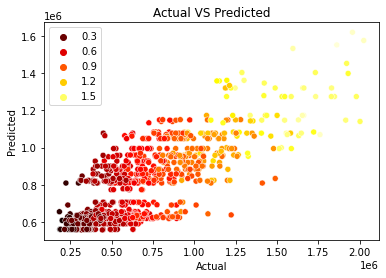

In [69]:
sns.scatterplot(y_test,y_pred6,hue=y_pred,palette='hot')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted')

# Predictions

In [70]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,
'Predicted Value':y_pred6,'Difference':y_test-y_pred6})
pred_y_df[0:5]

,Actual Value,Predicted Value,Difference
1039,2025199,1.577432e+06,447767.292428
3077,500899,9.003588e+05,-399459.775655
4487,305499,6.184172e+05,-312918.172277
1365,443799,6.074617e+05,-163662.696912
940,545099,6.272622e+05,-82163.168080


# Pipe Line For VotingRegressor

In [71]:
from sklearn.ensemble import VotingRegressor,StackingRegressor
trf11 = VotingRegressor([('lr',trf4), ('rf', trf5), ('dt',trf6)])
pipe7=make_pipeline(trf1,trf2,trf11)
pipe7.fit(x_train,y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoding',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Name', 'Company', 'City',
                                                   'Fuel_Type'])])),
                ('columntransformer-2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 108, None))])),
                ('votingregressor',
                 VotingRegressor(estimators=[('lr', LinearRegression()),
                                             ('rf', RandomForestRegressor()),
                                             ('dt',
                                              DecisionTreeRegressor())]))])

In [72]:
y_pred7=pipe7.predict(x_test)

Score 0.914559682510306
R2 Score 0.914559682510306
MSE 9591623044.573177


Text(0.5, 1.0, 'Distribution Of Residuals')

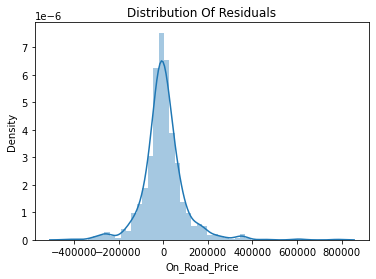

In [73]:
print('Score',pipe7.score(x_test,y_test))
print('R2 Score',r2_score(y_test,y_pred7))
print('MSE',mean_squared_error(y_test,y_pred7))
sns.distplot(y_test-y_pred7)
plt.title('Distribution Of Residuals')

Text(0.5, 1.0, 'Actual VS Predicted')

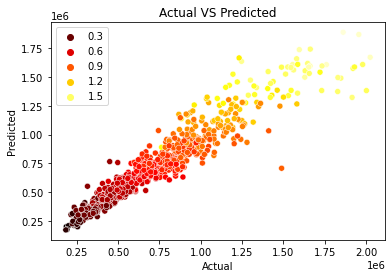

In [74]:
sns.scatterplot(y_test,y_pred7,hue=y_pred,palette='hot')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted')

# Prediction

In [75]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,
'Predicted Value':y_pred7,'Difference':y_test-y_pred7})
pred_y_df[0:5]

,Actual Value,Predicted Value,Difference
1039,2025199,1.671521e+06,353677.779585
3077,500899,5.052648e+05,-4365.757311
4487,305499,3.322320e+05,-26733.018847
1365,443799,3.922657e+05,51533.252478
940,545099,5.157332e+05,29365.794562


In [76]:
#pd.DataFrame({'Model':['Liner Regression','Random Forest','Decision Tree','Bagging','KNN','SVM'],'R2 Values':[1,0.999,0.998,0.999,0.86,-4.15],'MSE':[1.9002347595899853e-18,50739639.12,133721073.73,66519322.50,13848018802.81, 545861380131.2092]})

In [77]:
import pickle
pickle.dump(pipe7,open('VotingRegressorModel.pkl','wb'))
pickle.dump(df3,open('Cars24data.pkl','wb'))

In [80]:
df3

,Name,Company,City,Year,KM_Driven,No._of_Owners,Fuel_Type,Calculated_Score,On_Road_Price
0,MARUTISWIFT,MARUTI,Kolkata,2020,2944,1,Petrol,474000,614799
1,MARUTISWIFT,MARUTI,Kolkata,2018,79345,1,Petrol,715000,484299
2,HYUNDAIEON,HYUNDAI,Kolkata,2018,2624,1,Petrol,468000,337399
3,MARUTIWAGON R 1.0,MARUTI,Kolkata,2014,10953,1,Petrol,140000,356599
4,HYUNDAIELITE I20,HYUNDAI,Kolkata,2019,21415,1,Petrol,474000,532899
...,...,...,...,...,...,...,...,...,...
4854,HYUNDAINEW SANTRO,HYUNDAI,Ahmedabad,2019,12541,1,Petrol,367000,580899
4855,HYUNDAIGRAND I10,HYUNDAI,Ahmedabad,2017,43676,1,Petrol,169000,518499
4856,HONDAAMAZE,HONDA,New Delhi,2018,11951,1,Petrol,169000,767599
4857,MAHINDRAXUV500,MAHINDRA,New Delhi,2018,55280,2,Diesel,315000,1381899


In [81]:
#df3.to_csv('Cars24.final.csv')